# UNAD

## Hector Julio Hernandez Marin

## Agrupamiento en K-means

## Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [195]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [196]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [197]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [198]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

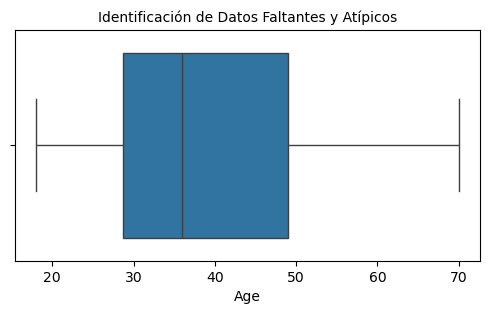

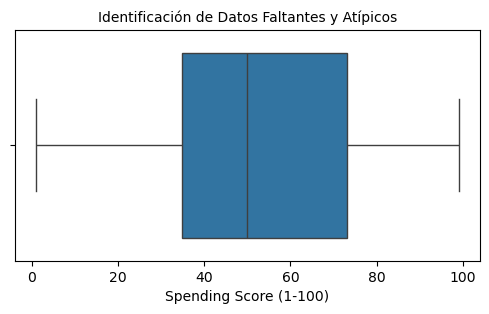

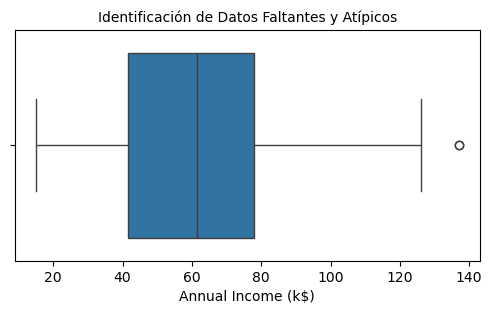

In [199]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [200]:
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuación de gasto (1-100): ",Datos['Spending Score (1-100)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Ingreso Anual (k$): ",Datos['Annual Income (k$)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Puntuación de gasto (1-100):  0
Cantidad de Registros con cero en Data Ingreso Anual (k$):  0


In [201]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())
Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

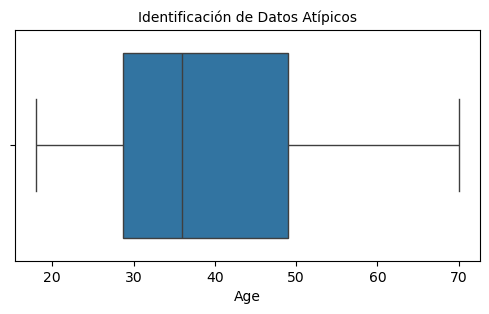

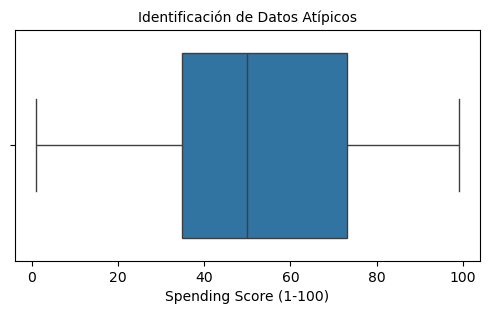

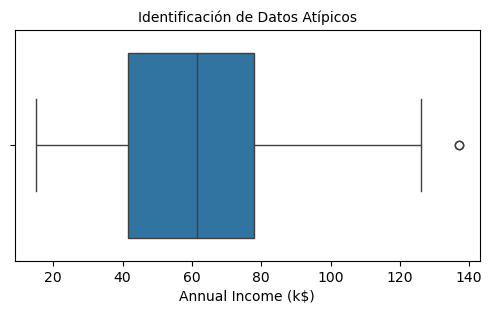

In [202]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [203]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Annual Income (k$)']<nivel_minimo)|(Datos['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0
El total de datos atípicos es 0
El total de datos atípicos es 14


In [204]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Annual Income (k$)']<nivel_maximo)&(Datos['Annual Income (k$)']>nivel_minimo)]

In [205]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:

. Data Ingreso Anual (k$)

. Puntuación de gasto (1-100)

. Edad

In [206]:

# Filtrar columnas del modelo 

Datos = Datos[["Age","Spending Score (1-100)","Annual Income (k$)"]]

In [207]:
Datos_uno = Datos.copy()
Datos_dos = Datos.copy()

In [208]:
# Revisión de los datos de las variables objetivo

Datos_uno.head(10)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17
5,22,76,17
6,35,6,18
7,23,94,18
8,64,3,19
9,30,72,19


In [209]:
# Revisión de los datos de las variables objetivo

Datos_dos.head(10)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17
5,22,76,17
6,35,6,18
7,23,94,18
8,64,3,19
9,30,72,19


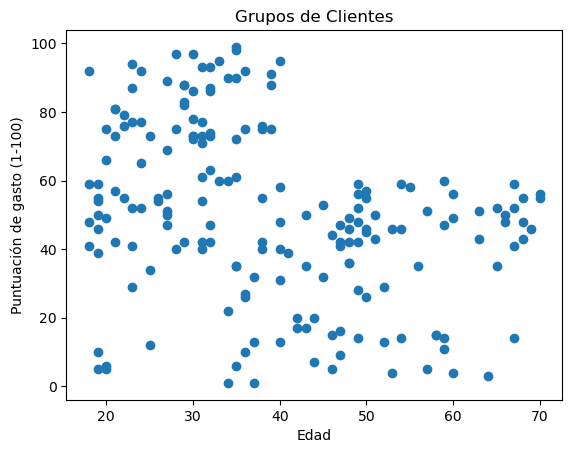

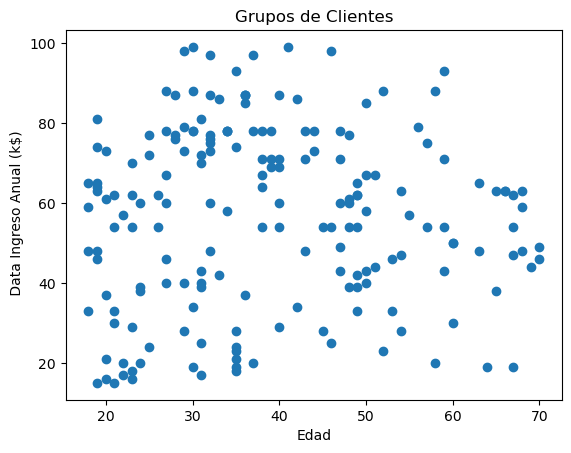

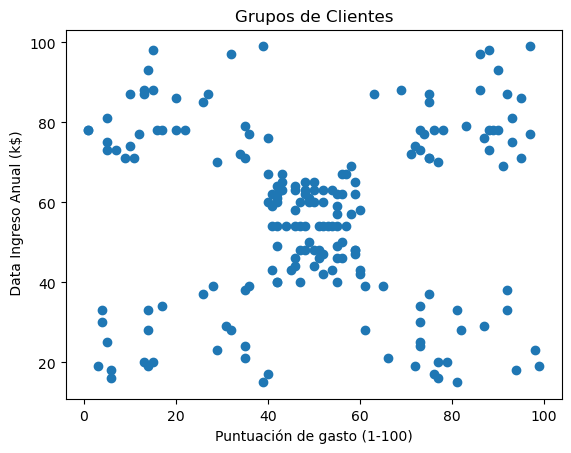

In [210]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Age'], Datos['Spending Score (1-100)'])
plt.xlabel('Edad')
plt.ylabel('Puntuación de gasto (1-100)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos['Age'], Datos['Annual Income (k$)'])
plt.xlabel('Edad')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos['Spending Score (1-100)'], Datos['Annual Income (k$)'])
plt.xlabel('Puntuación de gasto (1-100)')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros opcion 1

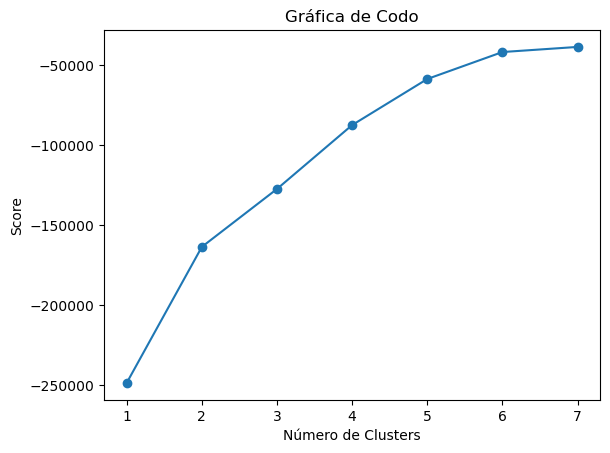

In [224]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [226]:
# Generación del modelo de Agrupamiento del modelo con K=6 (Es decir haremos 6 grupos de agrupamiento) 

Modelo_uno = KMeans(n_clusters=6, random_state=0)
Modelo_uno.fit(Datos_uno)

KMeans(n_clusters=6, random_state=0)

In [228]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo_uno.labels_
Datos_uno["Grupo_uno"] = Modelo_uno.labels_ 
print (Datos_uno)

     Age  Spending Score (1-100)  Annual Income (k$)  Grupo_uno
0     19                      39                  15          5
1     21                      81                  15          2
2     20                       6                  16          5
3     23                      77                  16          2
4     31                      40                  17          5
..   ...                     ...                 ...        ...
181   32                      86                  97          3
182   46                      15                  98          4
183   29                      88                  98          3
184   41                      39                  99          4
185   30                      97                  99          3

[186 rows x 4 columns]


# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. opcion 1

In [229]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos_uno)
X = Datos_uno.drop('Grupo_uno', axis=1)
clusters = Datos_uno['Grupo_uno']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data_uno = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data_uno, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         186         |
|  Coeficiente Silhouette  | 0.47343134037341206 |
| Indice Calinski Harabasz | 178.03837448788835  |
|  Indice Davies Bouldin   | 0.7294188630947932  |
+--------------------------+---------------------+


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo opcion 1

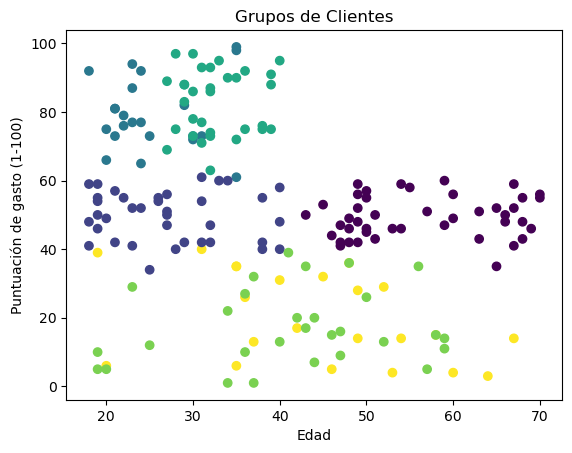

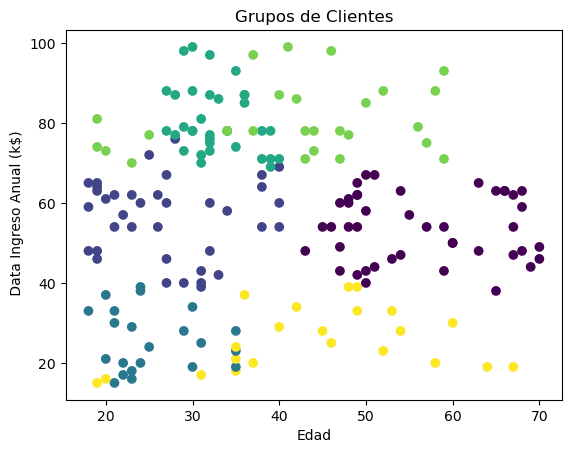

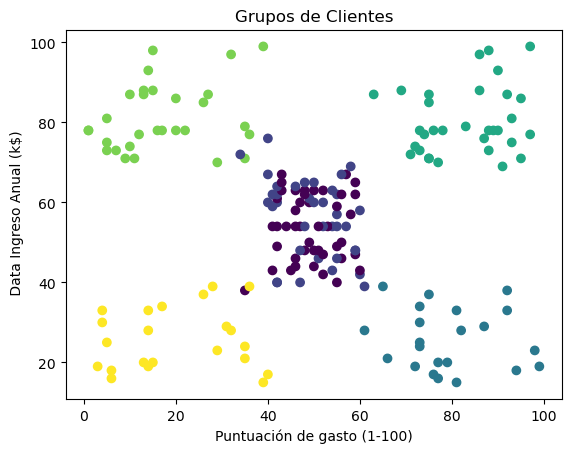

In [230]:
plt.scatter(Datos_uno['Age'], Datos_uno['Spending Score (1-100)'], c=Datos_uno['Grupo_uno'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Puntuación de gasto (1-100)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos_uno['Age'], Datos_uno['Annual Income (k$)'], c=Datos_uno['Grupo_uno'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos_uno['Spending Score (1-100)'], Datos_uno['Annual Income (k$)'], c=Datos_uno['Grupo_uno'], cmap='viridis')
plt.xlabel('Puntuación de gasto (1-100)')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

In [216]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos_uno, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo_uno', symbol='Grupo_uno', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

# 4. Entrenar el modelo configurando los diferentes hiperparámetros opcion 2

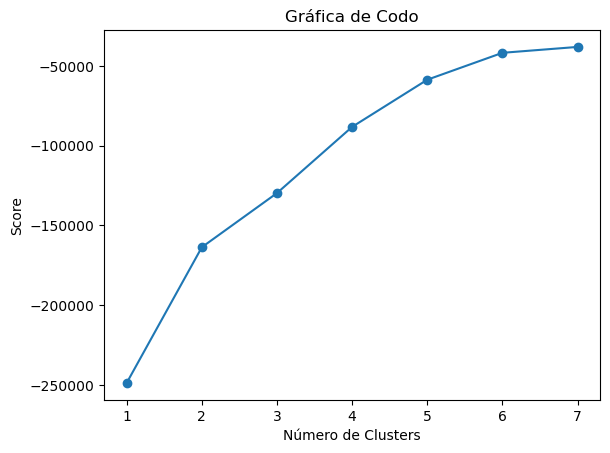

In [225]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [231]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo_dos = KMeans(n_clusters=5, random_state=0)
Modelo_dos.fit(Datos_dos)

KMeans(n_clusters=5, random_state=0)

In [233]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo_dos.labels_
Datos_dos["Grupo_dos"] = Modelo_dos.labels_ 
print (Datos_dos)

     Age  Spending Score (1-100)  Annual Income (k$)  Grupo_dos
0     19                      39                  15          1
1     21                      81                  15          2
2     20                       6                  16          1
3     23                      77                  16          2
4     31                      40                  17          1
..   ...                     ...                 ...        ...
181   32                      86                  97          3
182   46                      15                  98          4
183   29                      88                  98          3
184   41                      39                  99          4
185   30                      97                  99          3

[186 rows x 4 columns]


# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. opcion 2

In [234]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos_dos)
X = Datos_dos.drop('Grupo_dos', axis=1)
clusters = Datos_dos['Grupo_dos']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data_dos = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data_dos, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        186         |
|  Coeficiente Silhouette  | 0.411122607023641  |
| Indice Calinski Harabasz | 118.67608454190282 |
|  Indice Davies Bouldin   | 1.0604381586044658 |
+--------------------------+--------------------+


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo opcion 2

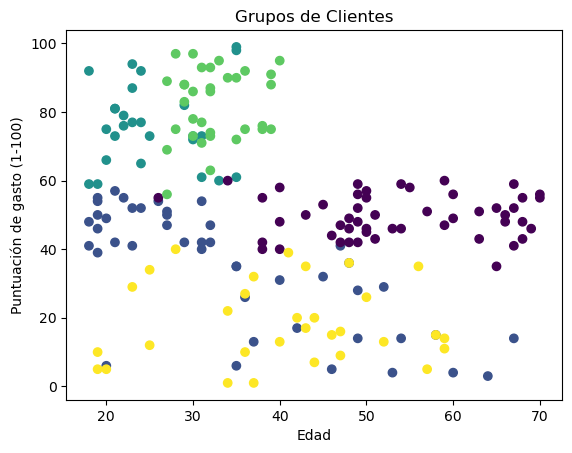

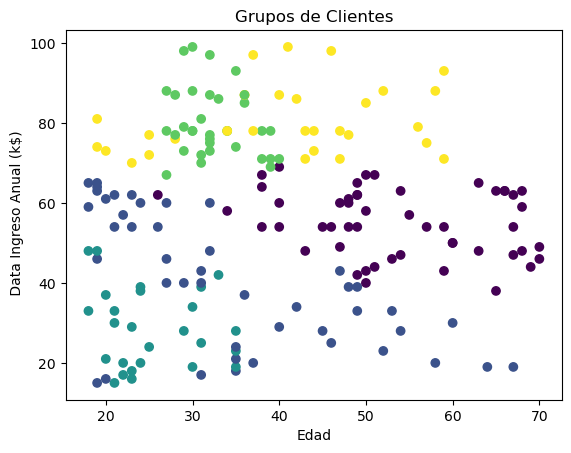

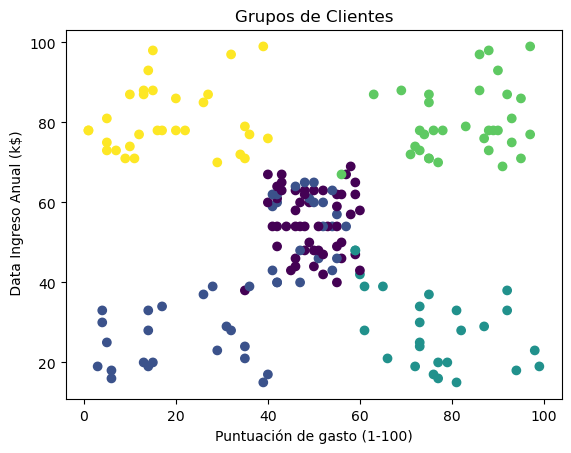

In [235]:
plt.scatter(Datos_dos['Age'], Datos_dos['Spending Score (1-100)'], c=Datos_dos['Grupo_dos'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Puntuación de gasto (1-100)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos_dos['Age'], Datos_dos['Annual Income (k$)'], c=Datos_dos['Grupo_dos'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

plt.scatter(Datos_dos['Spending Score (1-100)'], Datos_dos['Annual Income (k$)'], c=Datos_dos['Grupo_dos'], cmap='viridis')
plt.xlabel('Puntuación de gasto (1-100)')
plt.ylabel(' Data Ingreso Anual (k$)')
plt.title('Grupos de Clientes')
plt.show()

In [236]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos_dos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo_dos', symbol='Grupo_dos', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

# 7. Interpretar, analizar y documentar los resultados obtenidos

1. Coeficiente Silhouette
    5 grupos : 0,4107
    6 grupos : 0,4734
Interpretación : El coeficiente Silhouette mide la coherencia de los clusters. Un valor cercano a 1 indica que los clusters están bien definidos y que los puntos están más cerca de sus propios centroides que de los de otros clusters. En este caso, el valor para 6 clusters (0.4734) es mayor que el de 5 clusters (0.4107), lo que sugiere que la separación entre clusters es mejor cuando se elige 6 clusters.

2. Índice Calinski-Harabasz
    5 grupos : 118.776
    6 grupos : 178.038
Interpretación : Este índice evalúa la dispersión entre y dentro de los clusters. Cuanto mayor sea el valor, mejor es la formación de los clusters, ya que muestra que la distancia entre clusters es grande y que los puntos están agrupados más estrechamente dentro de sus clusters. Aquí, el valor es considerablemente mayor para 6 racimos, lo que indica una mejor separación y compactación.

3. Índice Davies-Bouldin
    5 grupos : 1.0643
    6 grupos : 0,7294
Interpretación : El índice Davies-Bouldin mide la media de las ratios de similitud entre cada cluster y el cluster más parecido. Un valor más bajo indica una mejor formación de clusters, ya que muestra menos similitud entre clusters. Para este índice, 6 clusters también muestra un valor más bajo, lo cual sugiere que la configuración de 6 clusters tiene menor superposición y mayor separación entre grupos.

Conclusión
Los tres índices (Silhouette, Calinski-Harabasz y Davies-Bouldin) indican que 6 clusters ofrece una mejor estructura en los datos en comparación con 5 clusters. Esto sugiere que los clusters están mejor definidos y que los datos están más agrupados y separados adecuadamente cuando se usa 6 clusters.

Por lo tanto, 6 clusters parece ser una opción más adecuada para este conjunto de datos.